epoch: 1, loss_train: 0.3893,acc_train:0.8648 loss_valid: 0.3865,acc_valid:0.8696


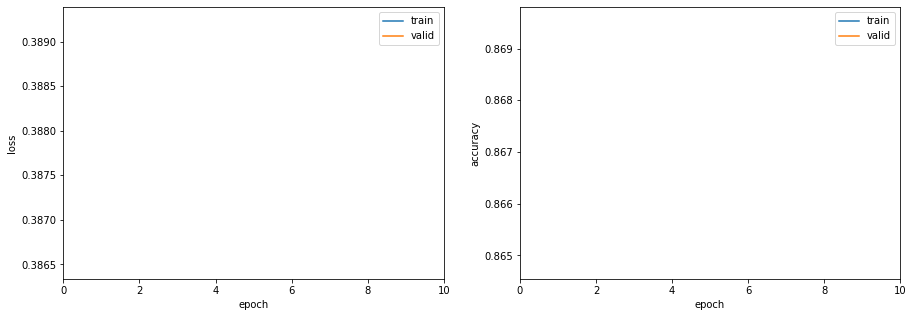

epoch: 2, loss_train: 0.3484,acc_train:0.8796 loss_valid: 0.3448,acc_valid:0.8793


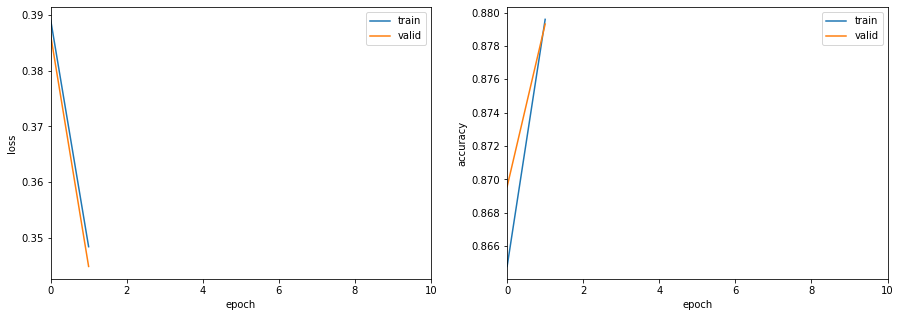

epoch: 3, loss_train: 0.3318,acc_train:0.8865 loss_valid: 0.3320,acc_valid:0.8846


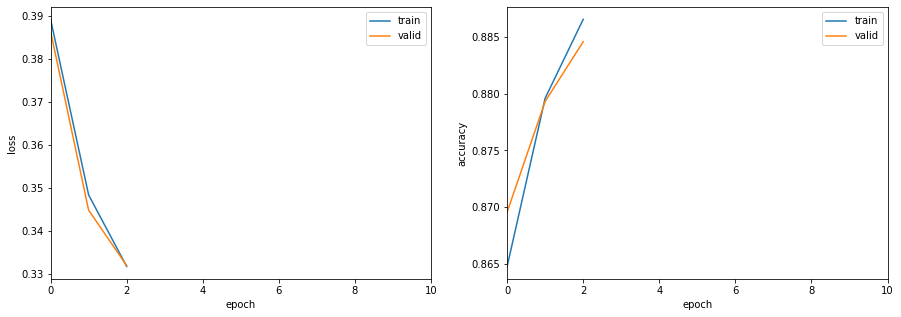

epoch: 4, loss_train: 0.3192,acc_train:0.8893 loss_valid: 0.3274,acc_valid:0.8876


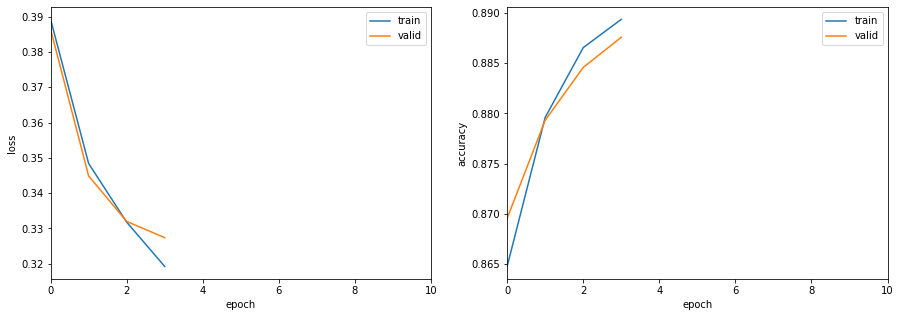

epoch: 5, loss_train: 0.3069,acc_train:0.8957 loss_valid: 0.3156,acc_valid:0.8898


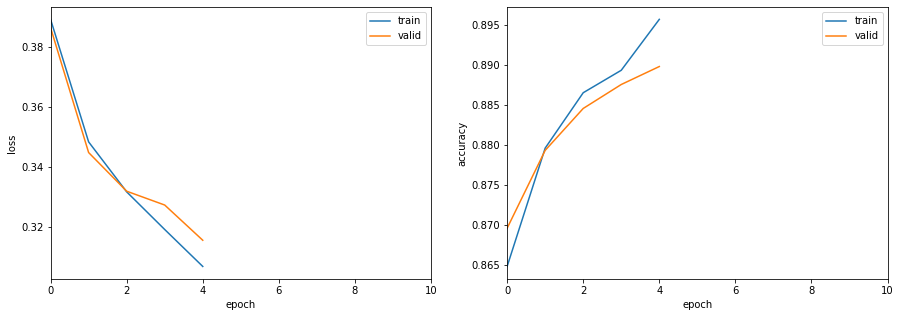

epoch: 6, loss_train: 0.2996,acc_train:0.8981 loss_valid: 0.3129,acc_valid:0.8943


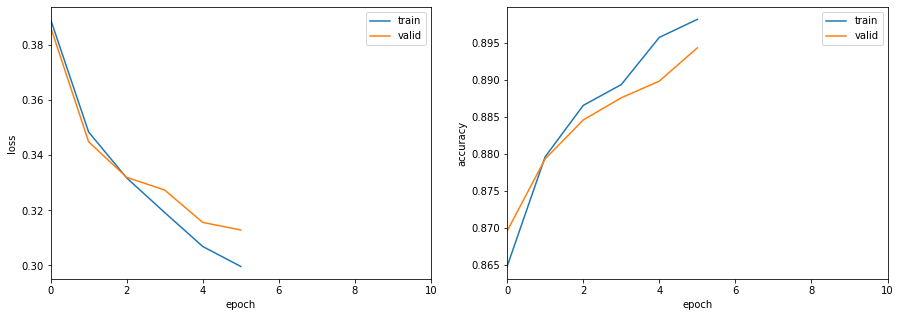

epoch: 7, loss_train: 0.2958,acc_train:0.8996 loss_valid: 0.3141,acc_valid:0.8898


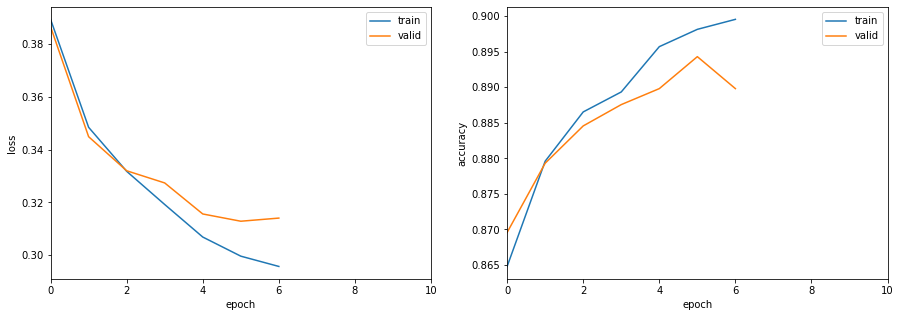

epoch: 8, loss_train: 0.2916,acc_train:0.9011 loss_valid: 0.3117,acc_valid:0.8936


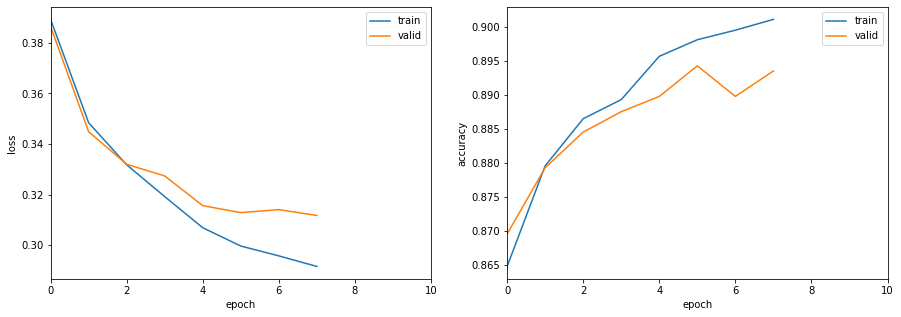

epoch: 9, loss_train: 0.2882,acc_train:0.9000 loss_valid: 0.3105,acc_valid:0.8958


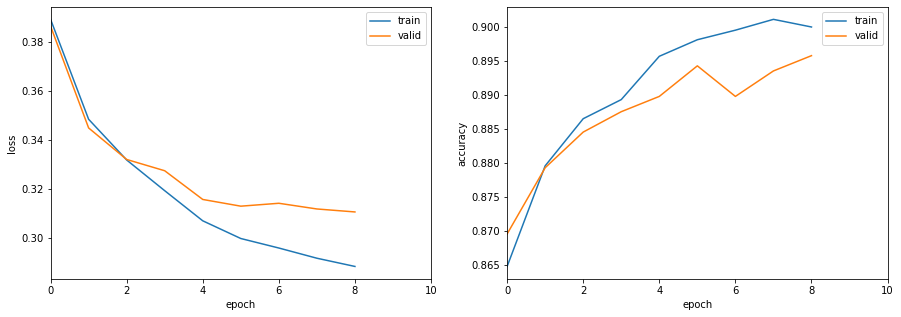

epoch: 10, loss_train: 0.2868,acc_train:0.9018 loss_valid: 0.3095,acc_valid:0.8943


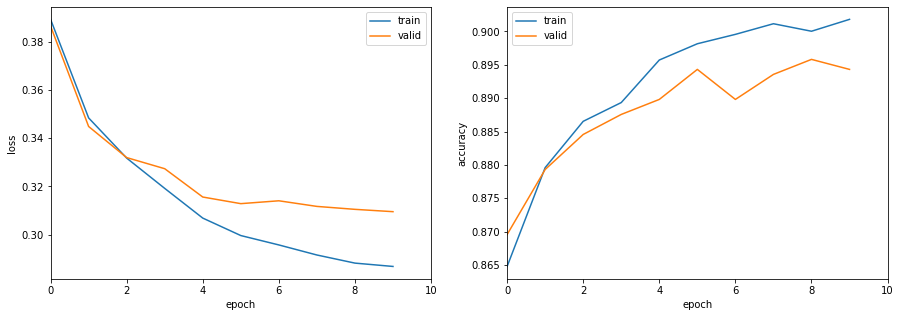

In [11]:
from torch.utils.data import Dataset
from torch import nn
import torch
from torch.utils.data import DataLoader
from q71 import SLPNet
from q73 import NewsDataset
from q74 import load_Dataloader
from matplotlib import pyplot as plt
import numpy as np
    
def calculate_loss_and_accuracy(model, criterion, loader):
    model.eval()
    loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss += criterion(outputs, labels).item()
            pred = torch.argmax(outputs, dim=-1)
            total += len(inputs)
            correct += (pred == labels).sum().item()
            
    return loss / len(loader), correct / total    

if __name__=="__main__":
    
    dataloader_train = load_Dataloader("train",1)
    dataloader_valid = load_Dataloader("valid",len(NewsDataset(torch.load("X_valid.pt"),torch.load("Y_valid.pt"))))
    dataloader_test = load_Dataloader("test",len(NewsDataset(torch.load("X_test.pt"),torch.load("Y_test.pt"))))
    
    # モデルの定義
    model = SLPNet(300, 4)
    
    # 損失関数の定義
    criterion = nn.CrossEntropyLoss()
    
    # オプティマイザの定義
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
    
    # 学習
    num_epochs = 10
    log_train = []
    log_valid = []
    for epoch in range(num_epochs):#各エポックについて、
        
        model.train()#モデルを訓練モードに設定
        loss_train = 0.0#ログの初期化
        
        for i, (inputs, labels) in enumerate(dataloader_train):
            # 勾配をゼロで初期化
            optimizer.zero_grad()
            # 順伝播 + 誤差逆伝播 + 重み更新
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)#損失関数の計算
            loss.backward()
            optimizer.step()#重みの更新
                        
        #損失関数と正解率を計算
        loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
        loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
        log_train.append([loss_train, acc_train])
        log_valid.append([loss_valid, acc_valid])
                         
        #ログ出力
        print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f},acc_train:{acc_train:.4f} loss_valid: {loss_valid:.4f},acc_valid:{acc_valid:.4f}') 
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].set_xlim(0,num_epochs)
#        ax[1].set_ylim(0,0.5)
        ax[0].plot(np.array(log_train).T[0], label='train')
        ax[0].plot(np.array(log_valid).T[0], label='valid')
        ax[0].set_xlabel('epoch')
        ax[0].set_ylabel('loss')
        ax[0].legend()
        ax[1].set_xlim(0,num_epochs)
#        ax[1].set_ylim(0.85,0.95)
        ax[1].plot(np.array(log_train).T[1], label='train')
        ax[1].plot(np.array(log_valid).T[1], label='valid')
        ax[1].set_xlabel('epoch')
        ax[1].set_ylabel('accuracy')
        ax[1].legend()
        plt.show()
        
        
        
    # 検証データの損失計算
    model.eval() 
    with torch.no_grad():
        inputs, labels = next(iter(dataloader_valid))
        outputs = model(inputs)
        loss_valid = criterion(outputs, labels)
        
    torch.save(model.to('cpu').state_dict(), 'model.pth')#パラメータの保存
    
#出力
# epoch: 1, loss_train: 0.5478, loss_valid: 0.3877
# epoch: 2, loss_train: 0.3815, loss_valid: 0.3488
# epoch: 3, loss_train: 0.3503, loss_valid: 0.3288
# epoch: 4, loss_train: 0.3333, loss_valid: 0.3221
# epoch: 5, loss_train: 0.3226, loss_valid: 0.3201
# epoch: 6, loss_train: 0.3150, loss_valid: 0.3166
# epoch: 7, loss_train: 0.3093, loss_valid: 0.3169
# epoch: 8, loss_train: 0.3047, loss_valid: 0.3144
# epoch: 9, loss_train: 0.3007, loss_valid: 0.3150
# epoch: 10, loss_train: 0.2981, loss_valid: 0.3111